:# Lab 2 Exercises for COMP 433 (Deep Learning)

## Exercise 1: Data Visualization and Multi-Class Classification


In this exercise, we will work with a dataset called [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) which has 3 categories and 178 samples. For each sample there are 13 features.

Start by running the cell below.

In [ ]:
#Load sklearn data
from sklearn.datasets import load_wine
data = load_wine()
#targets for each sample
print(data.target.shape)
# data
print(data.data.shape)

(178,)
(178, 13)


Class distribution refers to the number of examples that belong to each class.

We'll plot the class distribution at various points in the lab. Complete the following function. We'll be using this function at various points in the lab.

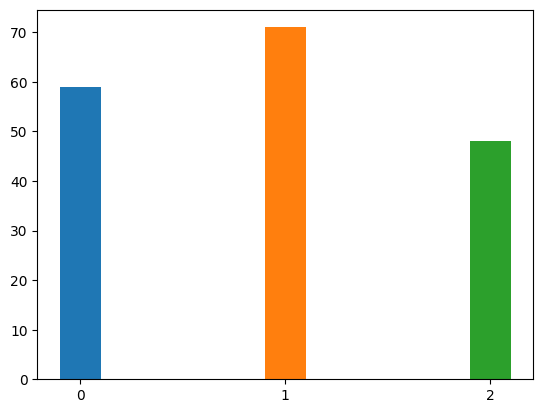

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(targets):
  plt.figure()
  width = 0.2
  for i in range(0, 3):
    # use logical 🤓 indexing on targets
    cls_count = np.sum(targets == i)
    plt.bar(i, cls_count, width)
  plt.xticks([0, 1, 2])
  plt.show()

plot_class_distribution(data.target)



 Pick any **two** models from the list of sklearn models below:

 *   [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*   [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

*   [Random Forset Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Do not worry if we have not covered this algorithm in class, the goal is to get familiar with applying ML algorithms in sklearn.

----
Requirements:

1. First start by **splitting** your data into two sets: train and test using the 80/20 split rule. Utilize [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
2. **Train** your 2 models of choice using the train set. Make sure to set the appropriate hyperparameters for each model.
3. **Evaluate** your trained models on both the train and test data by getting the accuracy on both the training and test sets. Utilize [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Note: For reproducibility fix the random_state=42.
Your test accuracy should be >90%



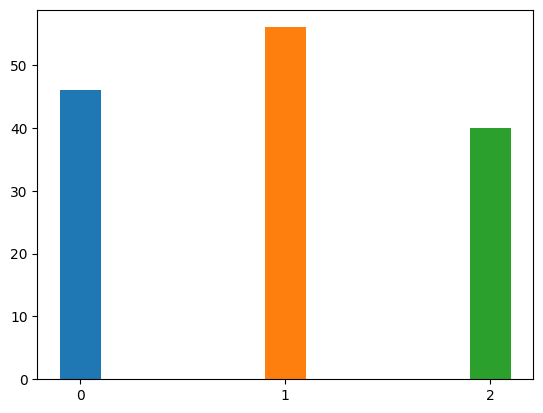

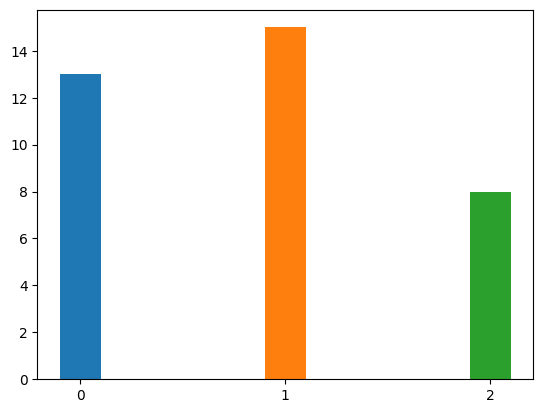

In [ ]:
from sklearn.model_selection import train_test_split
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.8)

#Visualize the class distribution of train and test
plot_class_distribution(y_train)
plot_class_distribution(y_test)

In [ ]:
#Train and evaluate accuracy with 2 different models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(random_state=42, max_iter=100, solver='liblinear').fit(X_train, y_train)
pred_test_logistic_regression = clf.predict(X_test)
pred_train_logistic_regression = clf.predict(X_train)

print(accuracy_score(y_test, pred_test_logistic_regression))
print(accuracy_score(y_train, pred_train_logistic_regression))



0.9166666666666666
0.9859154929577465


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=30, random_state=42)
clf.fit(X_train, y_train)

pred_test_random_forest = clf.predict(X_test)
pred_train_random_forest = clf.predict(X_train)

print(accuracy_score(y_test, pred_test_random_forest))
print(accuracy_score(y_train, pred_train_random_forest))

0.9444444444444444
1.0


Plot the class distributions of the fitted models.

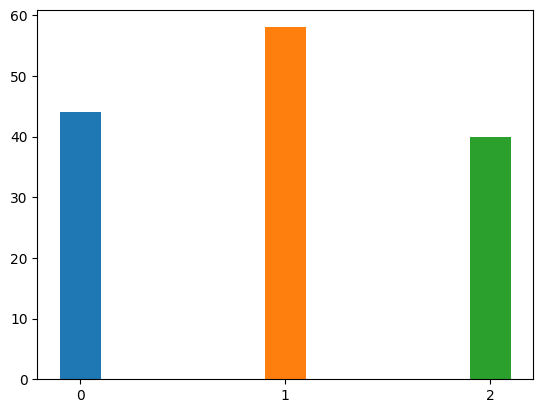

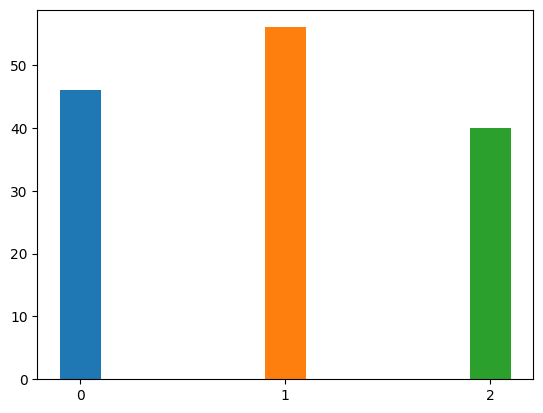

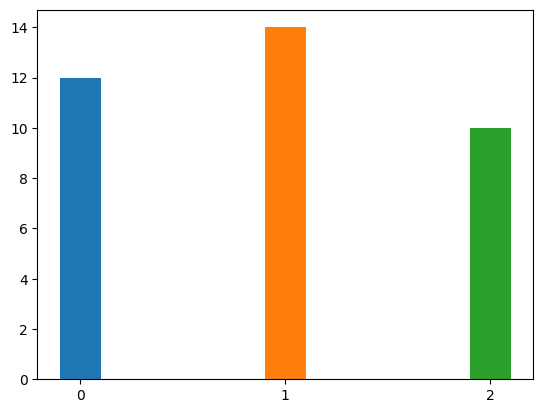

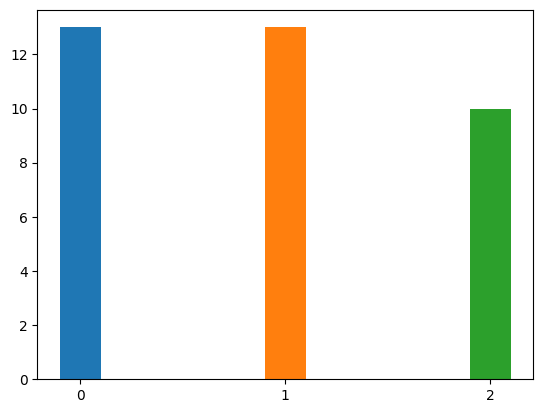

In [ ]:
#Visualize the class distributions of the trained models on some data

# Visualization of the train data
plot_class_distribution(pred_train_logistic_regression)
plot_class_distribution(pred_train_random_forest)

# Visualization of the test data
plot_class_distribution(pred_test_logistic_regression)
plot_class_distribution(pred_test_random_forest)

Does it look like your trained models match the class distributions of your training data? What about test data?

Explain.

Yes, the predictions on the train data match the distribution of the training data while the predictions on the test data match the
ditribution of the test data. In particular, in both cases, the higher the accuracy, the higher the similarity!

### Exercise 2:
# **Hyperparameter tuning**

Hyperparameter tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. Hyperparameters refer to a set of parameters whose values are chosen by the machine learning practitioner and unchanged by the learning algorithm, while parameters refer to a set of values changed by the learning algorithm.


Hyperparameter tuning methods, such as GridSearch, iterate over a set of values for each hyperparameter and evaluates models trained with these values on a validation set. Loss is often the metric looked at for models with the best fit, but accuracy can also be used.

Once the best set of values for hyperparameters has been found for a particular model, the model is trained on the full training set and then evaluated on the test set.


In this exercise, you will implement a grid search over the hyperparameter `C` of a LogisticRegression model.

1. Define `C_values = [0.1, 0.4, 1.0, 10]` and split the training set from the previous exercise into a train and validation set using `train_test_split`, you can take 20% of the train set for validation.
2. Utilize a for loop to iterate over the values of `C_values`, and define a LogisticRegression model with `C=C_values[index]`.
3. Train the model and evaluate the cross entropy loss or accuracy on the validation set.
4. Choose the best performing model and perform training on the full train set, with evaluation on the test set.

In [ ]:
def hyp_tuning():
    #SPLIT DATASET
    x_train_, x_val, y_train_, y_val = train_test_split(X_train, y_train, train_size=0.8)

    #INSTANTIATE SKLEARN MODEL WITH C_VALUE
    c_values = [0.1, 0.4, 1.0, 10]
    max_acc = 0
    best_c = 0

    for index in range(len(c_values)):
        #CALL .FIT FUNCTION
        clf = LogisticRegression(random_state=42, solver='liblinear', C=c_values[index]).fit(x_train_, y_train_)

        #EVALUATE WITH VALIDATION DATASET
        pred = clf.predict(x_val)
        acc = accuracy_score(y_val, pred)

        if acc > max_acc:
            best_c = c_values[index]
            max_acc = acc

    print(best_c, max_acc)
    return best_c



optimal_c = hyp_tuning()
clf = LogisticRegression(random_state=42, solver='liblinear', C=optimal_c).fit(X_train, y_train)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred))


0.1 0.9655172413793104
0.9166666666666666


---

## Exercise 3: KNN implementation


In this exercise, we will implement the K Nearest Neighbor algorithm on the MNIST and the CIFAR-10 datasets

### Data understanding and visualization

In [ ]:
import os
import torch
from torchvision.datasets import CIFAR10

#Inspect and understand the following functions
def _extract_tensors(dataset, num=None):
  """
  Extract the data and labels from a CIFAR10 dataset object and convert them to tensors.

  Input:
  - dset: A torchvision.datasets.CIFAR10 object
  - num: Optional. If provided, the number of samples to keep.

  Returns:
  - x: float32 tensor of shape (N, 3, 32, 32)
  - y: int64 tensor of shape (N,)
  """
  x = torch.tensor(dataset.data, dtype=torch.float32).permute(0, 3, 1, 2).div_(255)
  y = torch.tensor(dataset.targets, dtype=torch.int64)
  if num is not None:
    if num <= 0 or num > x.shape[0]:
      raise ValueError('Invalid value num=%d; must be in the range [0, %d]'
                       % (num, x.shape[0]))
    x = x[:num].clone()
    y = y[:num].clone()
  return x, y


def cifar10(num_train=None, num_test=None):
  """
  Return the CIFAR10 dataset, automatically downloading it if necessary. This function can also subsample the dataset.

  Inputs:
  - num_train: [Optional] How many samples to keep from the training set.
    If not provided, then keep the entire training set.
  - num_test: [Optional] How many samples to keep from the test set.
    If not provided, then keep the entire test set.

  Returns:
  - x_train: float32 tensor of shape (num_train, 3, 32, 32)
  - y_train: int64 tensor of shape (num_train, 3, 32, 32)
  - x_test: float32 tensor of shape (num_test, 3, 32, 32)
  - y_test: int64 tensor of shape (num_test, 3, 32, 32)
  """
  download = not os.path.isdir('cifar-10-batches-py')
  dset_train = CIFAR10(root='.', download=download, train=True)
  dset_test = CIFAR10(root='.', train=False)
  x_train, y_train = _extract_tensors(dset_train, num_train)
  x_test, y_test = _extract_tensors(dset_test, num_test)

  return x_train, y_train, x_test, y_test

torch.Size([1000, 3, 32, 32]) torch.Size([1000]) torch.Size([400, 3, 32, 32]) torch.Size([400])


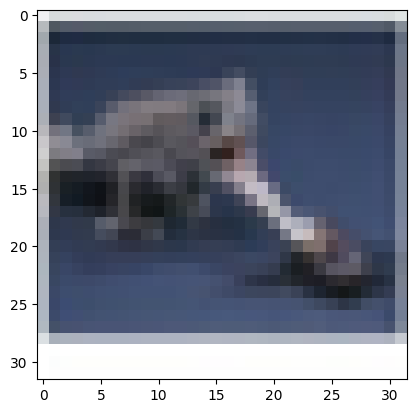

In [ ]:
N = 1000
p = .4


X_train, y_train, X_test, y_test = cifar10(N, int(p*N))

# Write the code to show the shape of training and testing data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# Write the code to show a random image of training set
rnd_img = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[rnd_img].permute(1, 2, 0))


### Writing distance functions

In [ ]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training set and each element of the test set. Images should be flattened and treated as vectors.
  Your implementation should only use a single loop over the training data. Inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`, `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist. You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, D1, D2, ...)
  - x_test: Torch tensor of shape (num_test, D1, D2, ...)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the squared Euclidean distance between the ith training point and the jth test point.
  """

  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  ##############################################################################
  # Replace "pass" statement with your code
  x_test_vec = x_test.reshape(num_test, -1)   # Converting each image into a row vector

  for idx in range(num_train):
    diff = torch.pow(x_train[idx].reshape(1, -1) - x_test_vec, 2)
    dists[idx] = torch.sqrt(torch.sum(diff, dim=1))

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists


def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training set and each element of the test set. Images should be flattened and treated as vectors.

  This implementation should not use any Python loops. For memory-efficiency, it also should not create any large intermediate tensors; in particular you should not create any intermediate tensors
  with O(num_train*num_test) elements.
  Similar to compute_distances_one_loop, this should be able to handle inputs with any number of dimensions. The inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`, `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist. You may not use any functions from torch.nn or torch.nn.functional.

  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the squared Euclidean distance between the ith training point and the jth test point.
  """

  # Initialize dists to be a tensor of shape (num_train, num_test) with the  same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = x_train.new_zeros(num_train, num_test)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  # Replace "pass" statement with your code

  x_train_vec = x_train.reshape(num_train, -1)
  x_test_vec = x_test.reshape(num_test, -1).T

  x_train_2 = torch.sum(torch.pow(x_train_vec, 2), dim=-1, keepdim=True)
  x_test_2 = torch.sum(torch.pow(x_test_vec, 2), dim=0, keepdim=True)

  dists = torch.sqrt(x_train_2 + x_test_2 - 2*torch.matmul(x_train_vec, x_test_vec))

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists




### Testing the distance functions

In [ ]:
# Write the code to test the previous functions, compare their results (absolute difference) and their computational time, use the two following random data. Use the "time" librairy to compute the computational time
import time

x_train_rand = torch.randn(100, 3, 32, 32, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 32, 32, dtype=torch.float64)

#Your code here
start = time.time()

dist1 = compute_distances_one_loop(x_train_rand, x_test_rand)
end_1 = time.time()
print(f"One loop dist took {end_1 - start} seconds")

dist2 = compute_distances_no_loops(x_train_rand, x_test_rand)
end_2 = time.time()
print(f"No loop dist took {end_2 - end_1} seconds")

print(torch.sum(torch.abs(dist1 - dist2)))

One loop dist took 0.11997079849243164 seconds
No loop dist took 0.003000497817993164 seconds
tensor(3.3182e-11, dtype=torch.float64)


### Writting the KNN classifier

In [ ]:
class KnnClassifier:
  def __init__(self, x_train, y_train):
    """
    Create a new K-Nearest Neighbor classifier with the specified training data.
    In the initializer we simply memorize the provided training data.

    Inputs:
    - x_train: Torch tensor of shape (num_train, C, H, W) giving training data
    - y_train: int64 torch tensor of shape (num_train,) giving training labels
    """
    ###########################################################################
    # TODO: Implement the initializer for this class. It should perform no    #
    # computation and simply memorize the training data.                      #
    ###########################################################################
    # Replace "pass" statement with your code
    self.train_data = x_train.reshape(x_train.shape[0], -1)
    self.train_label = y_train
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

  def predict(self, x_test, k=1):
    """
    Make predictions using the classifier.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - k: The number of neighbors to use for predictions

    Returns:
    - y_test_pred: Torch tensor of shape (num_test,) giving predicted labels
      for the test samples.
    """
    y_test_pred = None
    ###########################################################################
    # TODO: Implement this method. You should use the functions you wrote     #
    # above for computing distances (use the no-loop variant) and to predict  #
    # output labels.
    ###########################################################################
    # Replace "pass" statement with your code
    x_test_vec = x_test.reshape(x_test.shape[0], -1)
    dist = compute_distances_no_loops(self.train_data, x_test_vec).T

    neighbors = torch.argsort(dist, dim=1)[:, :k]
    labels = self.train_label[neighbors]
    y_test_pred = torch.mode(labels, dim=1).values
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################
    return y_test_pred

  def check_accuracy(self, x_test, y_test, k=1, quiet=False):
    """
    Utility method for checking the accuracy of this classifier on test data.
    Returns the accuracy of the classifier on the test data, and also prints a
    message giving the accuracy.

    Inputs:
    - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
    - y_test: int64 torch tensor of shape (num_test,) giving test labels
    - k: The number of neighbors to use for prediction
    - quiet: If True, don't print a message.

    Returns:
    - accuracy: Accuracy of this classifier on the test data, as a percent.
      Python float in the range [0, 100]
    """
    y_test_pred = self.predict(x_test, k=k)
    num_samples = x_test.shape[0]
    num_correct = torch.sum(y_test == y_test_pred).item()
    accuracy = 100.0 * num_correct / num_samples
    msg = (f'Got {num_correct} / {num_samples} correct; '
           f'accuracy is {accuracy:.2f}%')
    if not quiet:
      print(msg)
    return accuracy

### Testing the KNN Classifier

In [ ]:
# Read again the training and testing data

N = 5000
p = .2


X_train, y_train, X_test, y_test = cifar10(N, int(p*N))


classifier = KnnClassifier(X_train, y_train)

#check the accuracy
classifier.check_accuracy(X_test, y_test, k=1)

Got 268 / 1000 correct; accuracy is 26.80%


26.8

### Hold-out validation

Got 330 / 1250 correct; accuracy is 26.40%
Got 285 / 1250 correct; accuracy is 22.80%
Got 303 / 1250 correct; accuracy is 24.24%
Got 323 / 1250 correct; accuracy is 25.84%
Got 347 / 1250 correct; accuracy is 27.76%
Got 342 / 1250 correct; accuracy is 27.36%
Got 344 / 1250 correct; accuracy is 27.52%
Got 348 / 1250 correct; accuracy is 27.84%
Got 351 / 1250 correct; accuracy is 28.08%
Got 347 / 1250 correct; accuracy is 27.76%
9 28.08


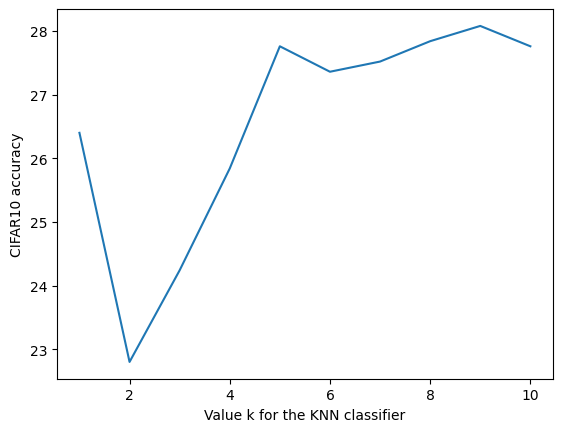

In [ ]:
torch.manual_seed(111)
# Split the data into training and validation set (75-25), 75% for training and 25% for testing, randomly sample train and testing indexes without repetition
x_train_, x_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Create several KNN classifier by varying K (up to 10), evaluate their accuracy on the validation set
acc_list = []
best_acc = 0
best_k = 0
classifier = KnnClassifier(x_train_, y_train_)
for k in range(1, 11):
    acc = classifier.check_accuracy(x_val, y_val, k=k)
    acc_list.append(acc)

    if acc > best_acc:
        best_acc = acc
        best_k = k

# Plot the curve accuracy vs value of K
plt.plot(range(1, 11), acc_list)
plt.xlabel("Value k for the KNN classifier")
plt.ylabel("CIFAR10 accuracy")

# Print the best value of K
print(best_k, best_acc)

In [ ]:
### Final model

#Compute the accuracy on testing data for the optimal K obtained after hold-out validation
classifier = KnnClassifier(X_train, y_train)

#check the accuracy
classifier.check_accuracy(X_test, y_test, k=best_k)

Got 270 / 1000 correct; accuracy is 27.00%


27.0